In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import netCDF4 as nc

In [2]:
#How to see the groups in the nc file
ds = nc.Dataset('/Users/hjb62/Python/CrunchTope/Omphalos/tests/rhea_test/results.nc')
display(ds)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: saturation, TotMineral, tortuosity, rate, totcon, area, pH, porosity, volume, velocity, conc, AqRate

In [6]:
# Always open the dataset using the group kwarg and the group of interest, xarray cannot deal with groups directly.
totcon = xr.open_dataset('/Users/hjb62/Python/CrunchTope/Omphalos/tests/rhea_test/results.nc',group='totcon')
totcon

<xarray.Dataset> Size: 7MB
Dimensions:      (file_num: 15, time: 26, X: 100, Y: 1, Z: 1)
Coordinates:
  * X            (X) float64 800B 5.0 15.0 25.0 35.0 ... 965.0 975.0 985.0 995.0
  * Y            (Y) float64 8B 5.0
  * Z            (Z) float64 8B 5.0
  * time         (time) float64 208B 1e-05 0.1 0.2 0.3 0.4 ... 2.2 2.3 2.4 2.5
Dimensions without coordinates: file_num
Data variables: (12/22)
    H+           (file_num, time, X, Y, Z) float64 312kB ...
    Acetate      (file_num, time, X, Y, Z) float64 312kB ...
    Al+++        (file_num, time, X, Y, Z) float64 312kB ...
    Fe++         (file_num, time, X, Y, Z) float64 312kB ...
    Fe+++        (file_num, time, X, Y, Z) float64 312kB ...
    Ca++         (file_num, time, X, Y, Z) float64 312kB ...
    ...           ...
    NH3(aq)      (file_num, time, X, Y, Z) float64 312kB ...
    NO3-         (file_num, time, X, Y, Z) float64 312kB ...
    C5H7O2NFe    (file_num, time, X, Y, Z) float64 312kB ...
    C5H7O2NSO4   (file_num, time, X, Y, Z) float64 312kB ...
    Methane(aq)  (file_num, time, X, Y, Z) float64 312kB ...
    Mg++         (file_num, time, X, Y, Z) float64 312kB ...

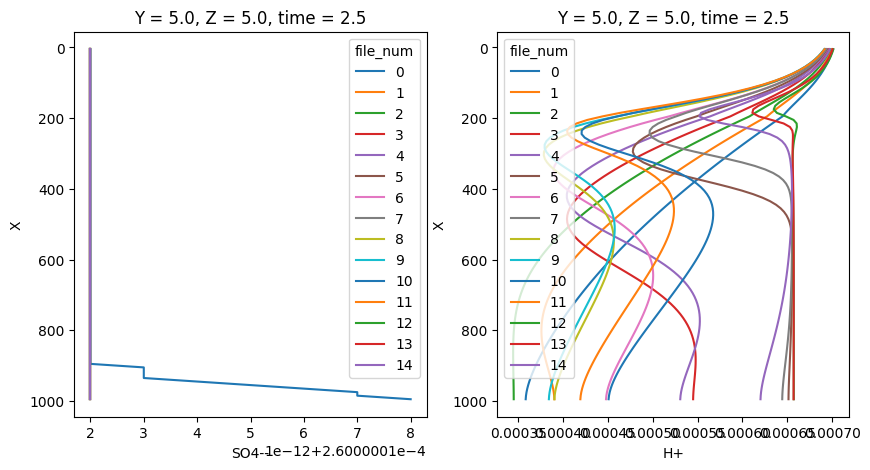

In [17]:
#Plotting different runs at a fixed time
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
subsetds = totcon.sel(time = 2.5, Y= 5, Z = 5,method='nearest')
subsetds['SO4--'].plot.line(y='X', yincrease=False,ax=axs[0])
subsetds['H+'].plot.line(y='X', yincrease=False,ax=axs[1])
